# Linear regression with categorical data

Predict the total spend in particular month based on Gender and City tier

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [197]:
data_set = pd.read_csv('./datasets/ecom_expense.csv')
data_set.head(20)

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485
5,TXN006,49,6,6282,48.974268,2,Male,Tier 2,2375.036467
6,TXN007,21,14,7086,961.203768,8,Male,Tier 1,7494.474559
7,TXN008,58,9,8881,962.253740,10,Male,Tier 3,10782.944920
8,TXN009,20,6,5635,858.328132,5,Male,Tier 1,3854.277411
9,TXN010,48,12,20861,43.036737,4,Female,Tier 2,5346.140262


In [198]:
# Data dummy creation
dummy_gender =pd.get_dummies(data_set['Gender'], prefix='Gender', dtype=int).iloc[:,:-1]
dummy_city_tier = pd.get_dummies(data_set['City Tier'], prefix='City', dtype=int).iloc[:,1:]

In [199]:
dummy_gender.head()

,Gender_Female
0,1
1,1
2,0
3,1
4,1


In [200]:
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [201]:
# Joining data with dummy data
column_names = data_set.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [202]:
# Joining dummies
joined_data_set = data_set[column_names].join(dummy_gender)
column_names = joined_data_set.columns.values.tolist()
joined_data_set = joined_data_set[column_names].join(dummy_city_tier)
# show updating
joined_data_set.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,1,0


In [203]:
# num records in data_Set
data_set.size

21258

In [204]:
# Getting prediction variables
x_features_cols = [
    "Monthly Income",
    "Transaction Time",
    "Gender_Female",
    "Record",
    "City_Tier 2",
    "City_Tier 3",
]

In [205]:
X = joined_data_set[x_features_cols]
Y = joined_data_set['Total Spend']

In [206]:
X

,Monthly Income,Transaction Time,Gender_Female,Record,City_Tier 2,City_Tier 3
0,7313,627.668127,1,5,0,0
1,17747,126.904567,1,3,1,0
2,22845,873.469701,0,2,1,0
3,18552,380.219428,1,7,0,0
4,14439,403.374223,1,2,1,0
...,...,...,...,...,...,...
2357,5705,460.157207,0,3,1,0
2358,11202,851.924751,0,8,1,0
2359,21335,435.145358,1,8,0,1
2360,19294,658.439838,1,7,0,0


In [207]:
Y

0       4198.385084
1       4134.976648
2       5166.614455
3       7784.447676
4       3254.160485
           ...     
2357    2909.619546
2358    7968.633136
2359    8816.406448
2360    7915.595856
2361    6832.401686
Name: Total Spend, Length: 2362, dtype: float64

In [208]:
# splitting into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [209]:
x_train

,Monthly Income,Transaction Time,Gender_Female,Record,City_Tier 2,City_Tier 3
1424,22167,156.973464,0,6,0,0
1376,7934,692.705289,1,1,0,1
2050,17254,421.653166,0,4,0,0
914,19728,158.358498,0,3,1,0
676,26277,521.805880,1,8,0,0
...,...,...,...,...,...,...
1033,5050,920.947939,1,2,0,0
1731,23337,634.924087,0,6,1,0
763,29588,623.399313,0,0,0,0
835,5888,198.872036,1,5,0,0


In [210]:
x_test

,Monthly Income,Transaction Time,Gender_Female,Record,City_Tier 2,City_Tier 3
1755,23468,544.533792,1,0,0,1
2018,26298,462.087467,0,0,0,0
1996,20025,282.888582,0,2,1,0
1649,15381,21.381729,0,10,1,0
1334,10981,849.518353,1,1,0,1
...,...,...,...,...,...,...
781,28514,261.200188,0,9,0,0
2042,15959,951.322135,0,5,1,0
1914,7431,127.983308,1,9,0,1
1529,13798,260.156723,0,7,0,1


In [211]:
y_train

1424    7151.376970
1376    2530.154850
2050    5109.201865
914     4685.743060
676     9753.593910
           ...     
1033    2254.663179
1731    7299.566526
763     6245.676632
835     3749.719449
1653    5079.904321
Name: Total Spend, Length: 1889, dtype: float64

In [212]:
y_test

1755     4285.802484
2018     5719.172419
1996     4625.651213
1649    11549.620250
1334     2967.067277
            ...     
781     11943.771920
2042     5592.344837
1914     8651.339907
1529     7406.867751
1045     4548.784586
Name: Total Spend, Length: 473, dtype: float64

In [213]:
# Getting model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)

0.9164421477604672

In [214]:
y_prediction_testing = lm.predict(x_test)
y_prediction_testing

array([ 3218.44263381,  4073.99812589,  4662.49078811, 10075.97493864,
        2214.15983549,  2182.51295642,  4758.77370461,  4700.87665276,
       11022.16498691,  7860.89013943,  5999.86769687,  4422.04071765,
        6005.613152  , 11573.00123069,  5051.97249514,  3669.79747499,
        1957.00180753,  2529.86764847,  8165.494642  ,  6523.01349324,
        3368.58664074,  7576.04446337,  5685.63479433,  4385.10370227,
        4139.72478907,  1482.33198441,  9693.23434387,  4701.64113451,
        5272.68053692,  6913.21856459,  7256.7912234 ,  8097.15171087,
        9115.74400111,  8929.91715784,  3128.01958013,  6228.72507007,
        9042.44976709,  4350.3423727 ,  6982.96133452,  3685.35252867,
        4537.79081321,  4394.98040045, 10534.78321891,  5414.79975899,
        1650.39479668,  6588.81552251,   689.00997366,  2959.5924539 ,
       10406.35185253,  5680.23535152,  4175.97779646,  3821.14155256,
        7949.80114729,  5617.39260419,  8747.50023446,  7495.30364651,
      

In [215]:
# Comparison real vs prediction
comp = pd.DataFrame({
    'Real data testing': y_test, 
    'Prediction testing':y_prediction_testing
})

comp.head(20)

,Real data testing,Prediction testing
1755,4285.802484,3218.442634
2018,5719.172419,4073.998126
1996,4625.651213,4662.490788
1649,11549.620250,10075.974939
1334,2967.067277,2214.159835
2005,2757.409424,2182.512956
949,5329.348101,4758.773705
597,5264.130007,4700.876653
762,11936.633940,11022.164987
2136,7036.297239,7860.890139


In [216]:
print(f'm = {lm.intercept_}')
for i,e in  enumerate(lm.coef_):
    print(f'x{i} = {e}')

m = 136.4052434237965
x0 = 0.146459305334961
x1 = 0.18612508878930925
x2 = -270.2537070771967
x3 = 767.7892688243682
x4 = 5.006755313556827
x5 = -186.16728042601443


In [238]:
pd.DataFrame(lm.coef_, X.columns, columns=['Coefficients'])

,Coefficients
Monthly Income,0.146459
Transaction Time,0.186125
Gender_Female,-270.253707
Record,767.789269
City_Tier 2,5.006755
City_Tier 3,-186.167280


In [217]:
coefficients = list(zip(x_features_cols, lm.coef_))
m = lm.intercept_
coefficients

[('Monthly Income', 0.146459305334961),
 ('Transaction Time', 0.18612508878930925),
 ('Gender_Female', -270.2537070771967),
 ('Record', 767.7892688243682),
 ('City_Tier 2', 5.006755313556827),
 ('City_Tier 3', -186.16728042601443)]

In [218]:
def regression_equation(data_frame:pd.DataFrame, coef:list, m):
    acc = data_frame[coef[0][0]]*coef[0][1]
    for i in range(1,len(coef)):
        col = coef[i][0] # predictor variable
        c = coef[i][1]
        temp = data_frame[col]*c
        acc = list(np.sum([temp, acc], axis=0))
    acc = m + acc
    return acc

In [219]:
model = f'total spend = {lm.intercept_} + '
for i,e in enumerate(coefficients):
    model += f'({e[0]})*{e[1]} + '
print("Regression equation: ")
print(model)

Regression equation: 
total spend = 136.4052434237965 + (Monthly Income)*0.146459305334961 + (Transaction Time)*0.18612508878930925 + (Gender_Female)*-270.2537070771967 + (Record)*767.7892688243682 + (City_Tier 2)*5.006755313556827 + (City_Tier 3)*-186.16728042601443 + 


#### Note:

This exercise is only for "categorical linear regression example propose" because if we deep dive into data, we’ll notice the only feature cols are related with Y (Total spend) are 'Monthly Income' and 'Record'

c:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


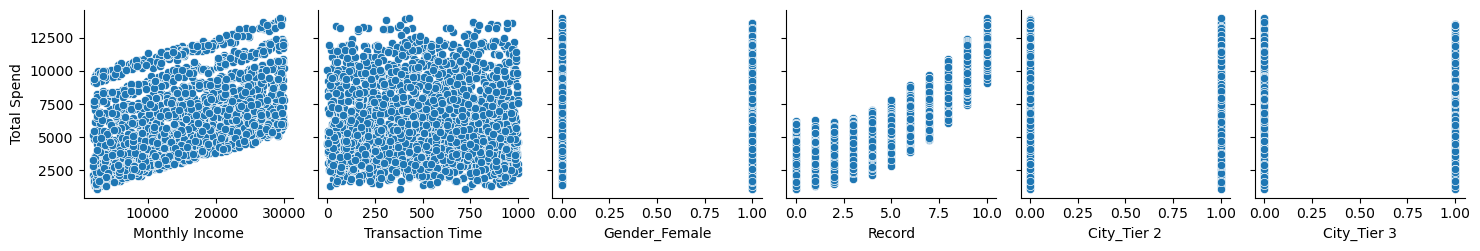

In [235]:
import seaborn as sns
# Relation plot examples
sns.pairplot(
    data=joined_data_set, 
    x_vars=x_features_cols, 
    y_vars=['Total Spend'],
    )

c:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


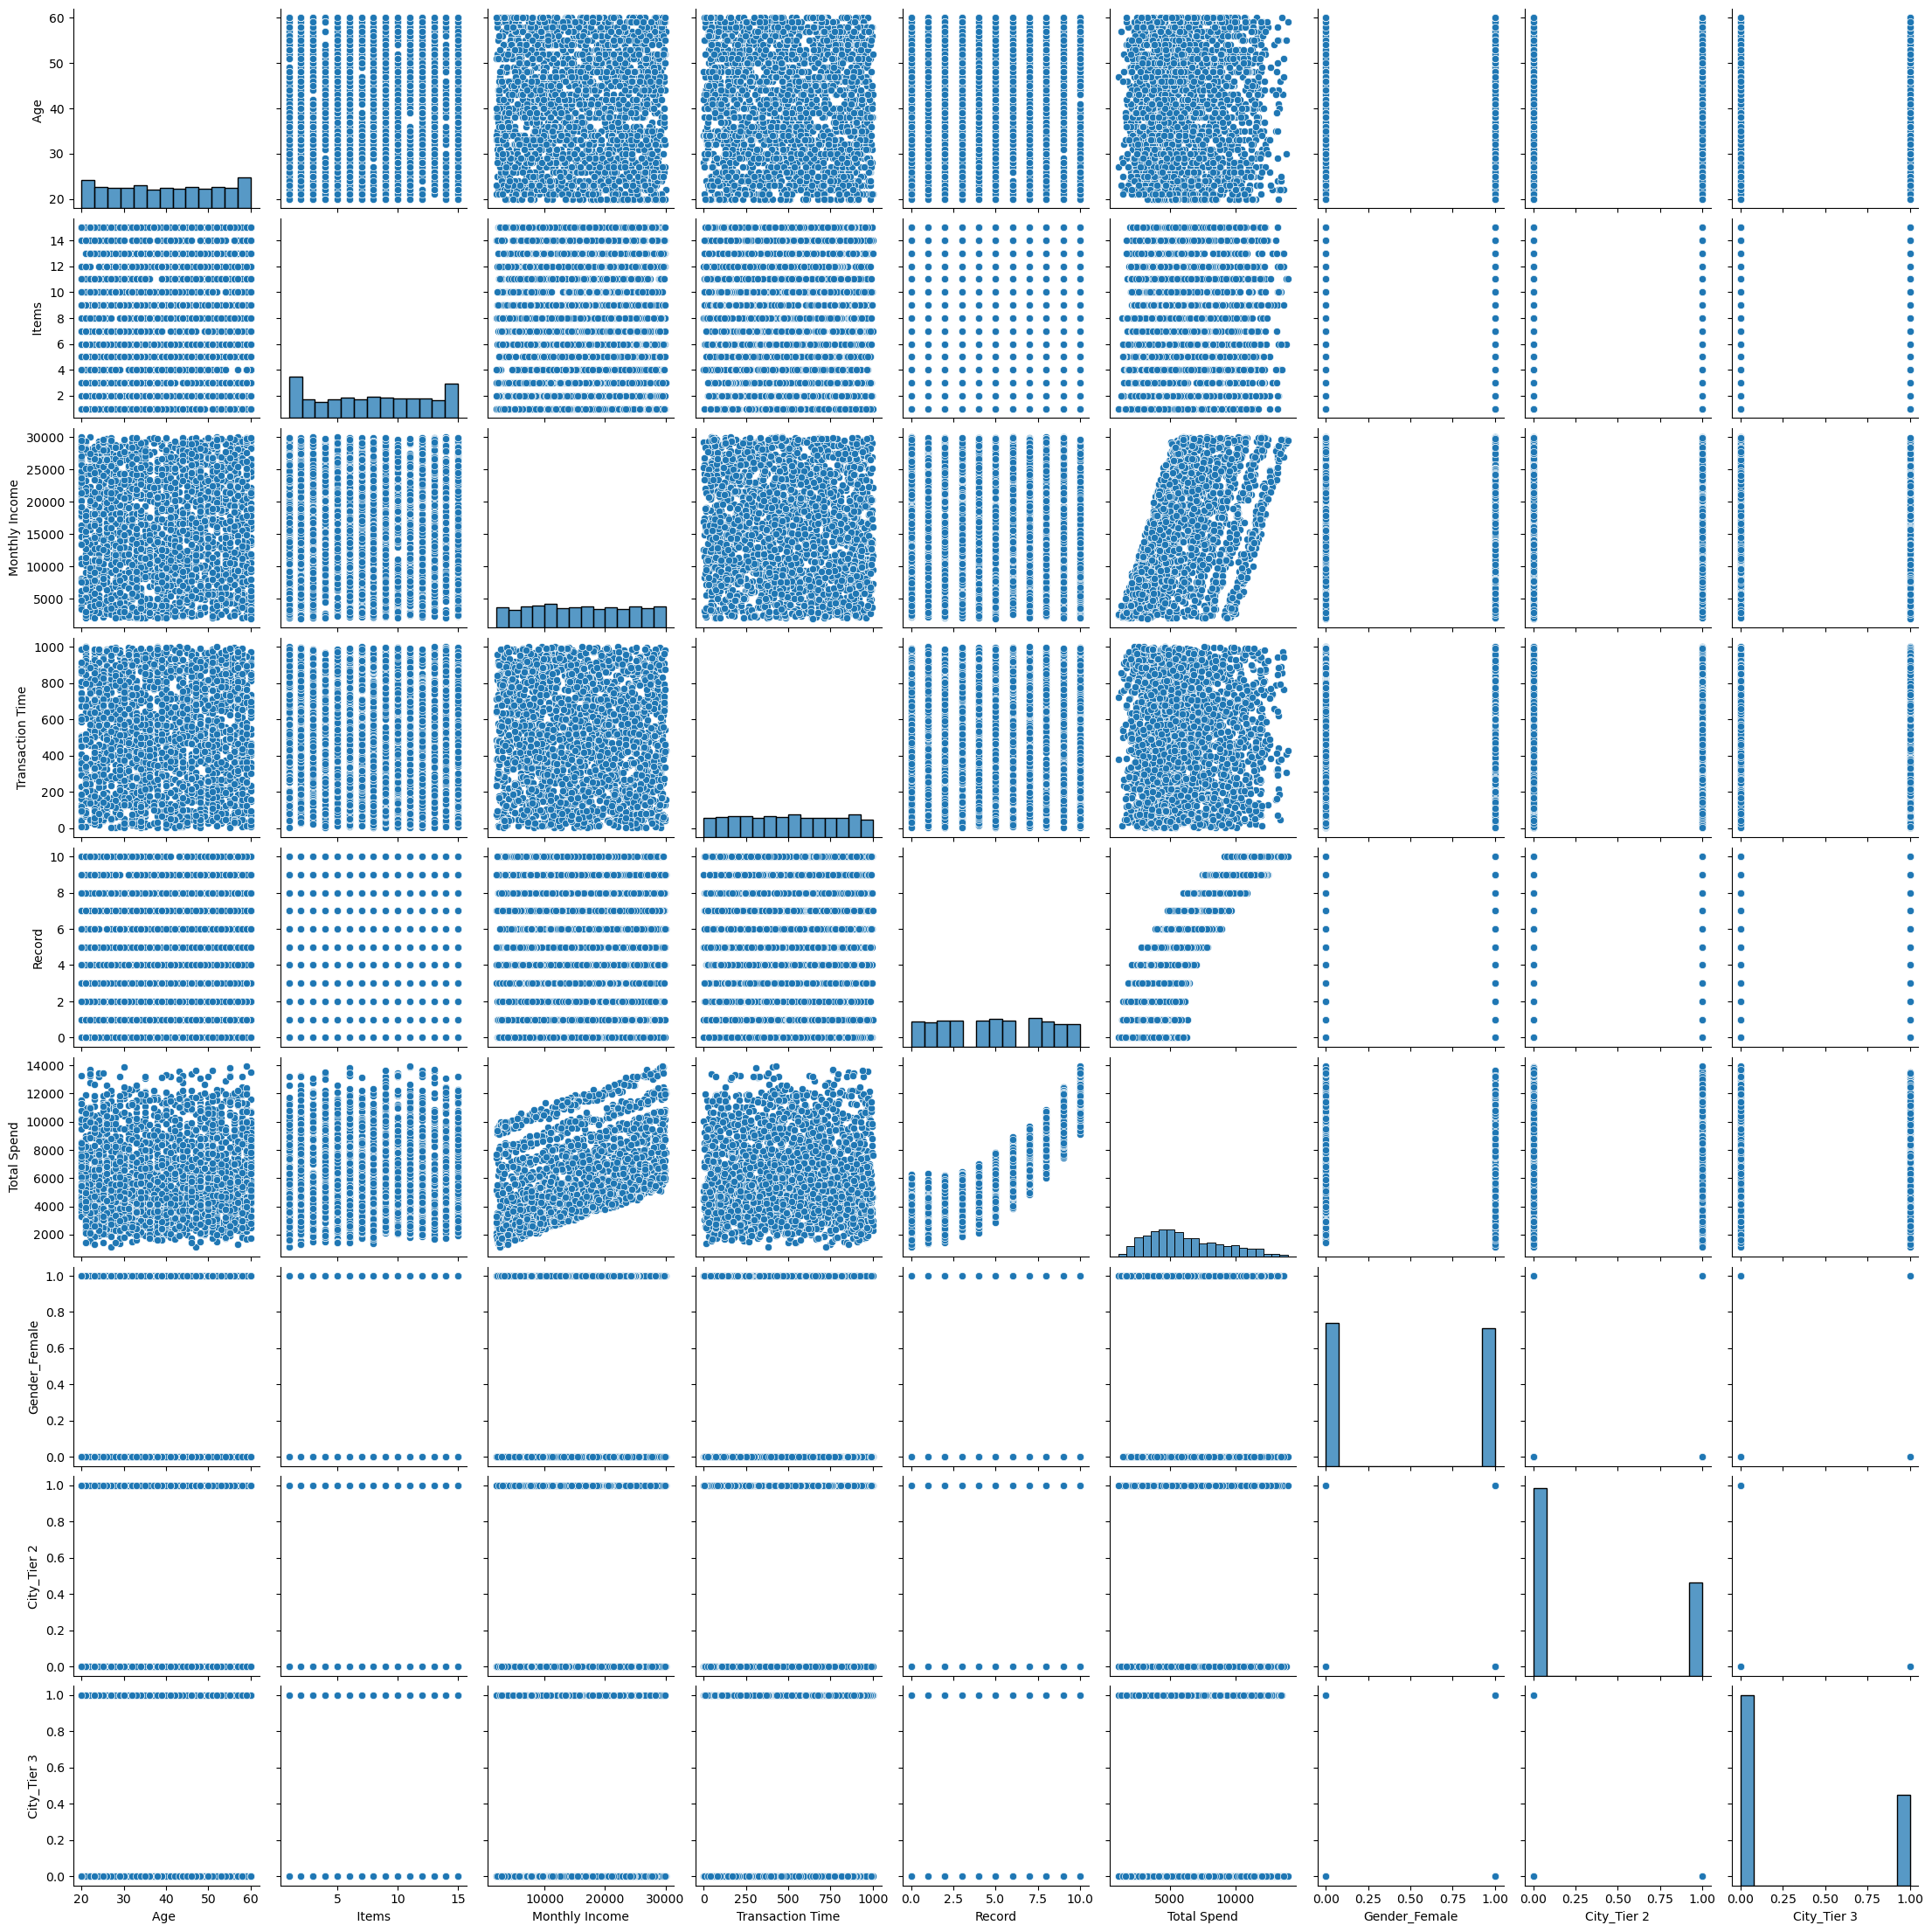

In [236]:
sns.pairplot(joined_data_set)